In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Raw Data Loading
# 현재 사용하는 데이터의 크기가 약 500M정도이기 때문에
# google drive에서 colab으로 파일을 불러올 수 있었어요!
# 파일이 더 커지면 못 불러와요!
# (그러면 어떻게 하나요? Google Storage Service) => 돈이 들어요!
df = pd.read_csv('/content/drive/MyDrive/Colab임시폴더/cat_dog/train.csv')
display(df.head())
print(df.shape)   # (25000, 6401)

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,-93,-91,-90,-91,-90,-91,-91,-91,-90,...,-98,-89,-92,-88,-87,-93,-91,-95,-88,-99
1,1,72,82,91,95,102,87,83,99,105,...,-90,-72,-96,-96,-92,-91,-79,-76,-104,114
2,0,-128,125,122,114,117,114,120,127,126,...,-69,-78,-69,-67,-77,-70,-76,-70,-74,-64
3,0,78,-49,-49,-93,-90,44,-1,-5,-8,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,50,53,51,55,53,59,56,68,70,...,82,87,85,97,92,90,85,90,79,77


(25000, 6401)


In [5]:
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

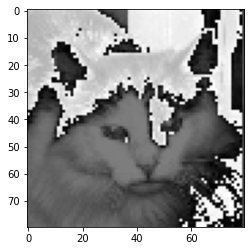

In [9]:
plt.imshow(x_data[152:153].reshape(80,80), cmap='gray')
plt.show()

In [10]:
# data split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(x_data,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)

# Normalization(정규화)
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [12]:
# model 생성

model = Sequential()

# CNN - Feature Extraction

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME',
                 input_shape=(80,80,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer
model.add(Flatten())
model.add(Dropout(rate=0.5))

# Hidden layer
model.add(Dense(units=256,
                activation='relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 80, 80, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)      

In [13]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(norm_train_x_data.reshape(-1,80,80,1),
                    train_t_data.reshape(-1,1),
                    epochs=200,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/200
123/123 [==============================] - 15s 31ms/step - loss: 0.6738 - accuracy: 0.5673 - val_loss: 0.6492 - val_accuracy: 0.5964
Epoch 2/200
123/123 [==============================] - 3s 28ms/step - loss: 0.6384 - accuracy: 0.6264 - val_loss: 0.6241 - val_accuracy: 0.6345
Epoch 3/200
123/123 [==============================] - 4s 29ms/step - loss: 0.6075 - accuracy: 0.6610 - val_loss: 0.6202 - val_accuracy: 0.6488
Epoch 4/200
123/123 [==============================] - 3s 28ms/step - loss: 0.5916 - accuracy: 0.6779 - val_loss: 0.5867 - val_accuracy: 0.6827
Epoch 5/200
123/123 [==============================] - 3s 27ms/step - loss: 0.5706 - accuracy: 0.6985 - val_loss: 0.5694 - val_accuracy: 0.7032
Epoch 6/200
123/123 [==============================] - 3s 27ms/step - loss: 0.5541 - accuracy: 0.7104 - val_loss: 0.5578 - val_accuracy: 0.7135
Epoch 7/200
123/123 [==============================] - 3s 28ms/step - loss: 0.5455 - accuracy: 0.7238 - val_loss: 0.5494 - val_accuracy

In [14]:
result = model.evaluate(norm_test_x_data.reshape(-1,80,80,1),
                        test_t_data.reshape(-1,1))
print(result)
#        loss                accuracy
# [0.8666917681694031, 0.7685333490371704]

235/235 [==============================] - 1s 5ms/step - loss: 0.8667 - accuracy: 0.7685
[0.8666917681694031, 0.7685333490371704]


In [16]:
model.save('/content/drive/MyDrive/Colab임시폴더/cat_dog/full_data_model/full_data_model.h5')

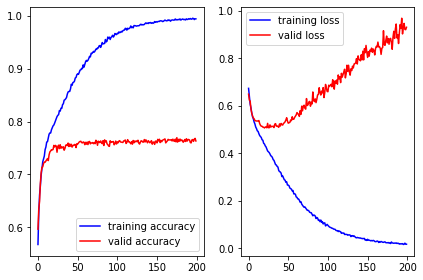

In [18]:
# history 객체를 이용해서 간단하게 학습과정에 대한 그래프를 그려보아요!

train_acc = history.history['accuracy']
train_loss = history.history['loss']

valid_acc = history.history['val_accuracy']
valid_loss = history.history['val_loss']

figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='b', label='training accuracy')
ax1.plot(valid_acc, color='r', label='valid accuracy')
ax1.legend()

ax2.plot(train_loss, color='b', label='training loss')
ax2.plot(valid_loss, color='r', label='valid loss')
ax2.legend()

plt.tight_layout()
plt.show()
